In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
pd.set_option('display.max_columns', None)

In [2]:
# Function to read all the datasets
def read_all(template,start,end):
    frames = [ pd.read_json(f).fillna(0) for f in [template.format(i) for i in range(start,end)] ]
    X = pd.concat(frames, ignore_index = True,sort = True)
    return X
template = "datasets/dataset_finalized/dataset_{:02}.json"
df = read_all(template,0,18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87141 entries, 0 to 87140
Columns: 178 entries, Ak47_ct to t_leads
dtypes: float64(11), int64(167)
memory usage: 118.3 MB


In [6]:
df.head()

,Ak47_ct,Ak47_t,Aug_ct,Aug_t,Awp_ct,Awp_t,C4_t,Cz75Auto_ct,Cz75Auto_t,Deagle_ct,Deagle_t,DecoyGrenade_ct,DecoyGrenade_t,Flashbang_ct,Flashbang_t,Glock_ct,Glock_t,HeGrenade_ct,HeGrenade_t,M4a4_ct,M4a4_t,MolotovIncendiaryGrenade_ct,MolotovIncendiaryGrenade_t,Mp9_ct,Mp9_t,P2000_ct,P2000_t,P250_ct,P250_t,Sg553_ct,Sg553_t,SmokeGrenade_ct,SmokeGrenade_t,UspS_ct,UspS_t,alive_players_ct,alive_players_t,armor_ct1_Bin_Code,armor_ct2_Bin_Code,armor_ct3_Bin_Code,armor_ct4_Bin_Code,armor_ct5_Bin_Code,armor_ct_Bin_Code,armor_t1_Bin_Code,armor_t2_Bin_Code,armor_t3_Bin_Code,armor_t4_Bin_Code,armor_t5_Bin_Code,armor_t_Bin_Code,current_score_ct,current_score_t,defuse_kit_ct1,defuse_kit_ct2,defuse_kit_ct3,defuse_kit_ct4,defuse_kit_ct5,has_helmet_ct1,has_helmet_ct2,has_helmet_ct3,has_helmet_ct4,has_helmet_ct5,has_helmet_t1,has_helmet_t2,has_helmet_t3,has_helmet_t4,has_helmet_t5,health_ct1_Bin_Code,health_ct2_Bin_Code,health_ct3_Bin_Code,health_ct4_Bin_Code,health_ct5_Bin_Code,health_t1_Bin_Code,health_t2_Bin_Code,health_t3_Bin_Code,health_t4_Bin_Code,health_t5_Bin_Code,kwct_Ak47,kwct_Aug,kwct_Awp,kwct_C4,kwct_Cz75Auto,kwct_Deagle,kwct_Flashbang,kwct_Glock,kwct_HeGrenade,kwct_Knife,kwct_M4a4,kwct_MolotovIncendiaryGrenade,kwct_Mp9,kwct_P2000,kwct_P250,kwct_Sg553,kwct_SmokeGrenade,kwct_UspS,kwct_other_heavy,kwct_other_pistols,kwct_other_rifles,kwct_other_smgs,kwct_other_utils,kwct_other_world,kwt_Ak47,kwt_Aug,kwt_Awp,kwt_C4,kwt_Cz75Auto,kwt_Deagle,kwt_Flashbang,kwt_Glock,kwt_HeGrenade,kwt_Knife,kwt_M4a4,kwt_MolotovIncendiaryGrenade,kwt_Mp9,kwt_P2000,kwt_P250,kwt_Sg553,kwt_SmokeGrenade,kwt_UspS,kwt_other_heavy,kwt_other_pistols,kwt_other_rifles,kwt_other_smgs,kwt_other_utils,kwt_other_world,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,money_ct1_Bin_Code,money_ct2_Bin_Code,money_ct3_Bin_Code,money_ct4_Bin_Code,money_ct5_Bin_Code,money_ct_Bin_Code,money_t1_Bin_Code,money_t2_Bin_Code,money_t3_Bin_Code,money_t4_Bin_Code,money_t5_Bin_Code,money_t_Bin_Code,other_heavy_ct,other_heavy_t,other_pistols_ct,other_pistols_t,other_rifles_ct,other_rifles_t,other_smgs_ct,other_smgs_t,pos_bs_ct1,pos_bs_ct2,pos_bs_ct3,pos_bs_ct4,pos_bs_ct5,pos_bs_t1,pos_bs_t2,pos_bs_t3,pos_bs_t4,pos_bs_t5,pr_ct1,pr_ct2,pr_ct3,pr_ct4,pr_ct5,pr_t1,pr_t2,pr_t3,pr_t4,pr_t5,round_status_BombPlanted,round_status_FreezeTime,round_status_Normal,round_status_time_left,round_winner_t,t_leads
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,9,9,9,9,9,9,9,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,2,2,2,4,2,2,2,2,2,3,0,0,0,0,0,0,0,0,974.180822,944.306124,798.191308,795.495700,867.835823,3542.543173,3335.094646,3440.444855,3554.893954,3292.883831,5,5,5,5,5,4,5,5,4,3,0,1,0,20.00000,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,4,0,5,5,9,0,9,9,9,7,9,0,9,9,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,9,9,9,9,9,9,9,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,974.180822,944.306124,798.191308,795.495700,867.835823,3542.543173,3335.094646,3440.444855,3554.893954,3292.883831,5,5,5,5,5,4,5,5,4,3,0,1,0,1.03125,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,4,4,9,0,9,0,9,5,9,0,9,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,9,9,0,9,9,9,9,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,632.331458,373.469847,1358.088885,5000.000000,455.567476,3216.434149,1778.246945,1779.104521,5000.000000,1671.654509,1,2,1,0,2,1,3,3,0,3,0,0,1,96.03125,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,4,4,9,0,9,0,9,5,9,0,9,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,9,9,0,9,9,9,9,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [9]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
if len(missing)>0: missing.plot.bar()
else: print("No misssing values!")

No misssing values!


In [25]:
colwep = ['Ak47_ct', 'Ak47_t', 'Aug_ct', 'Aug_t', 'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct',\
          'Cz75Auto_t', 'Deagle_ct', 'Deagle_t', 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Flashbang_ct',\
          'Flashbang_t', 'Glock_ct', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct', 'M4a4_t',\
          'MolotovIncendiaryGrenade_ct', 'MolotovIncendiaryGrenade_t', 'Mp9_ct', 'Mp9_t', 'P2000_ct',\
          'P2000_t', 'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
          'UspS_ct', 'UspS_t','other_heavy_ct', 'other_heavy_t', 'other_pistols_ct', \
          'other_pistols_t', 'other_rifles_ct', 'other_rifles_t', 'other_smgs_ct', 'other_smgs_t']

colpla = ['alive_players_ct', 'alive_players_t', 'armor_ct1_Bin_Code', 'armor_ct2_Bin_Code',\
          'armor_ct3_Bin_Code', 'armor_ct4_Bin_Code', 'armor_ct5_Bin_Code', 'armor_ct_Bin_Code',\
          'armor_t1_Bin_Code', 'armor_t2_Bin_Code', 'armor_t3_Bin_Code', 'armor_t4_Bin_Code',\
          'armor_t5_Bin_Code', 'armor_t_Bin_Code','defuse_kit_ct1', 'defuse_kit_ct2',\
          'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5', 'has_helmet_ct1', 'has_helmet_ct2',\
          'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', 'has_helmet_t1', 'has_helmet_t2',\
          'has_helmet_t3', 'has_helmet_t4', 'has_helmet_t5', 'health_ct1_Bin_Code',\
          'health_ct2_Bin_Code', 'health_ct3_Bin_Code', 'health_ct4_Bin_Code', 'health_ct5_Bin_Code',\
          'health_t1_Bin_Code', 'health_t2_Bin_Code', 'health_t3_Bin_Code', 'health_t4_Bin_Code',\
          'health_t5_Bin_Code','money_ct1_Bin_Code', 'money_ct2_Bin_Code', 'money_ct3_Bin_Code',\
          'money_ct4_Bin_Code', 'money_ct5_Bin_Code', 'money_ct_Bin_Code', 'money_t1_Bin_Code',\
          'money_t2_Bin_Code', 'money_t3_Bin_Code', 'money_t4_Bin_Code', 'money_t5_Bin_Code',\
          'money_t_Bin_Code']

colsta = ['current_score_ct', 'current_score_t','t_leads','round_status_BombPlanted',\
          'round_status_FreezeTime', 'round_status_Normal', 'round_status_time_left']

colkill = ['kwct_Ak47', 'kwct_Aug', 'kwct_Awp', 'kwct_C4', 'kwct_Cz75Auto', 'kwct_Deagle',\
           'kwct_Flashbang', 'kwct_Glock', 'kwct_HeGrenade', 'kwct_Knife', 'kwct_M4a4',\
           'kwct_MolotovIncendiaryGrenade', 'kwct_Mp9', 'kwct_P2000', 'kwct_P250', 'kwct_Sg553',\
           'kwct_SmokeGrenade', 'kwct_UspS', 'kwct_other_heavy', 'kwct_other_pistols',\
           'kwct_other_rifles', 'kwct_other_smgs', 'kwct_other_utils', 'kwct_other_world', 'kwt_Ak47',\
           'kwt_Aug', 'kwt_Awp', 'kwt_C4', 'kwt_Cz75Auto', 'kwt_Deagle', 'kwt_Flashbang', 'kwt_Glock',\
           'kwt_HeGrenade', 'kwt_Knife', 'kwt_M4a4', 'kwt_MolotovIncendiaryGrenade', 'kwt_Mp9',\
           'kwt_P2000', 'kwt_P250', 'kwt_Sg553', 'kwt_SmokeGrenade', 'kwt_UspS', 'kwt_other_heavy',\
           'kwt_other_pistols', 'kwt_other_rifles', 'kwt_other_smgs', 'kwt_other_utils',\
           'kwt_other_world']

colmap = ['map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke', 'map_de_overpass',\
          'map_de_train', 'map_de_vertigo','map_de_cache']

colpos = ['pos_bs_ct1', 'pos_bs_ct2', 'pos_bs_ct3', 'pos_bs_ct4', 'pos_bs_ct5', 'pos_bs_t1',\
          'pos_bs_t2', 'pos_bs_t3', 'pos_bs_t4', 'pos_bs_t5']

# colpos = ['pos_bs_ct1', 'pos_bs_ct2', 'pos_bs_ct3', 'pos_bs_ct4', 'pos_bs_ct5', 'pos_bs_t1',\
#           'pos_bs_t2', 'pos_bs_t3', 'pos_bs_t4', 'pos_bs_t5', 'pr_ct1','pr_ct2', 'pr_ct3',\
#           'pr_ct4', 'pr_ct5', 'pr_t1', 'pr_t2', 'pr_t3', 'pr_t4', 'pr_t5']

cols = colpla+colsta+['round_winner_t']
df_main = df[cols]

In [26]:
df_main.shape

(87141, 59)

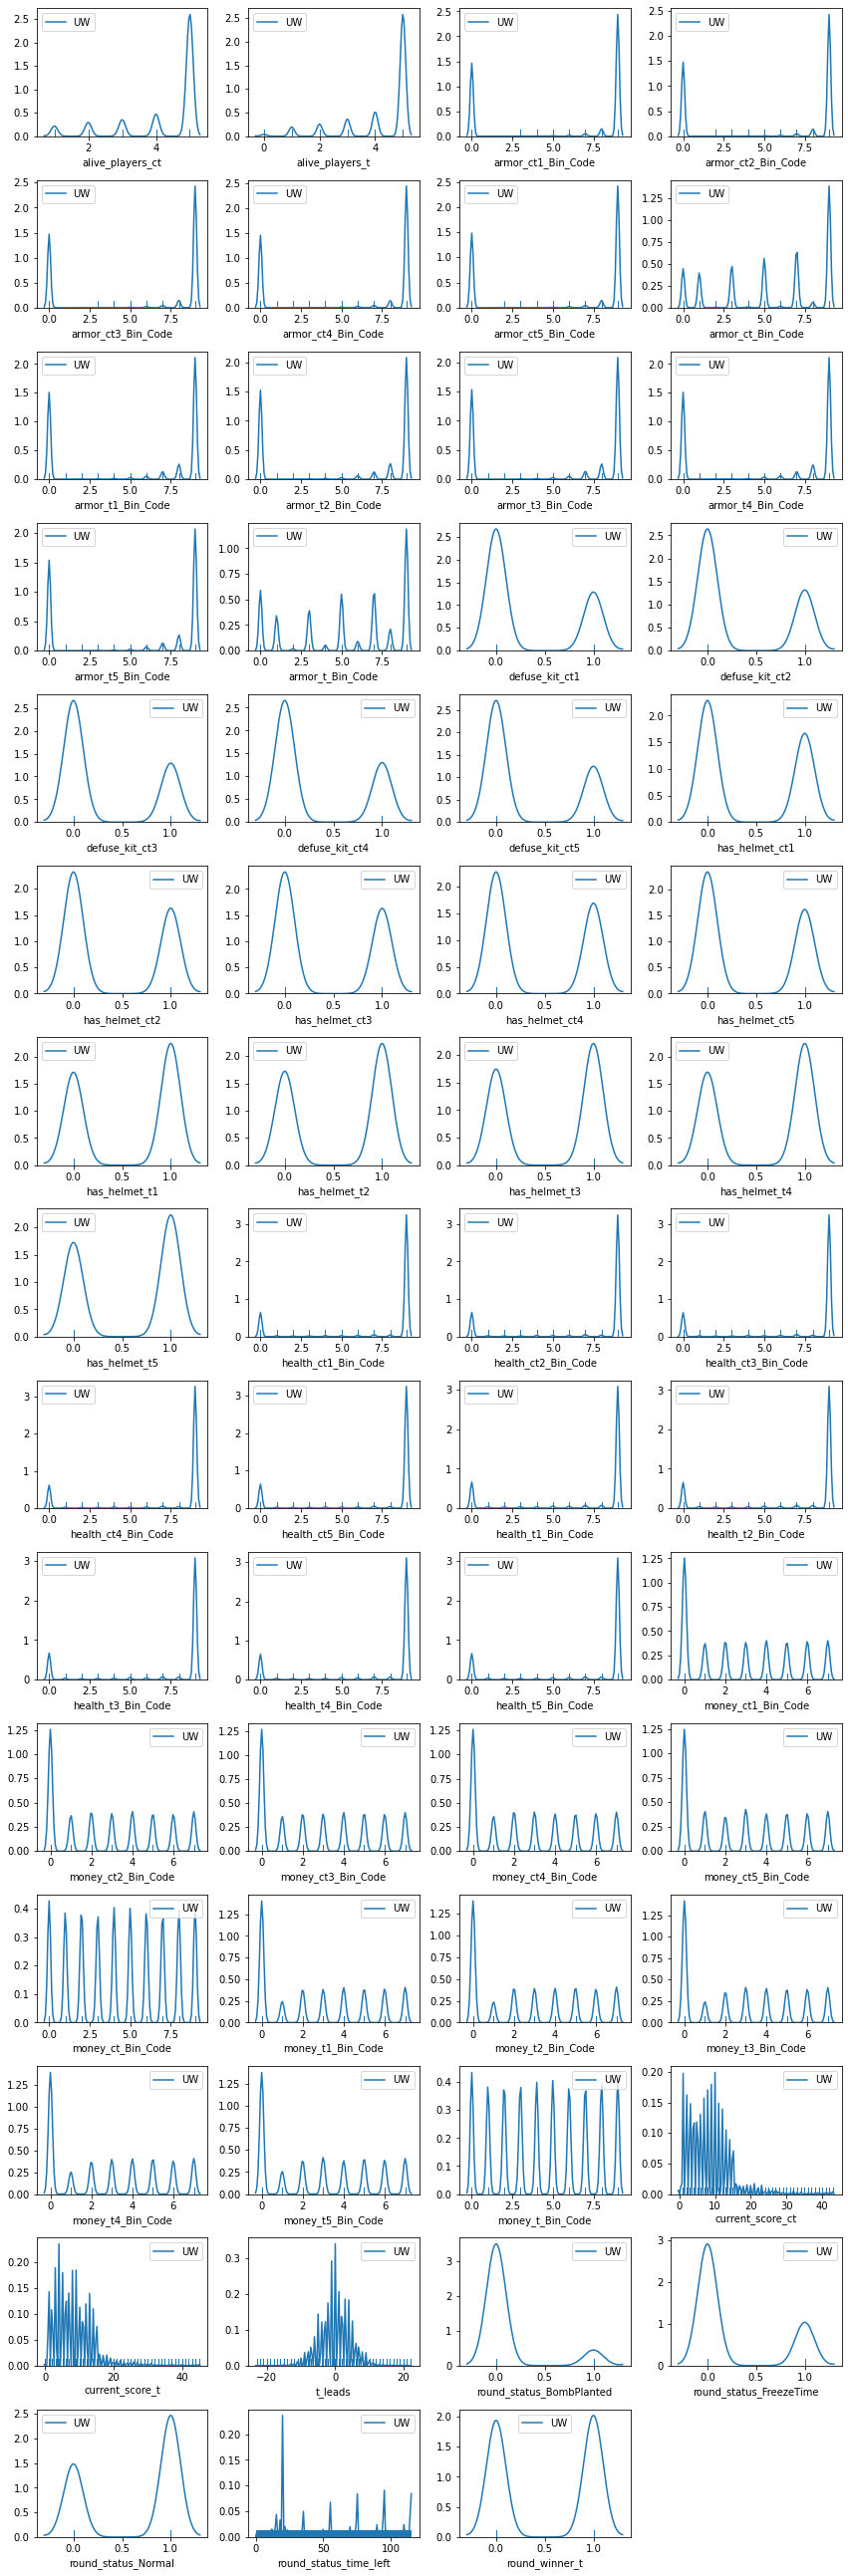

In [27]:
# Distribution of data
fig = plt.figure(figsize=(12,36))
for i in range(len(df_main.columns)):
    fig.add_subplot(15,4,i+1)
    sns.distplot(df_main.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(df_main.columns[i])
plt.tight_layout()
plt.show()

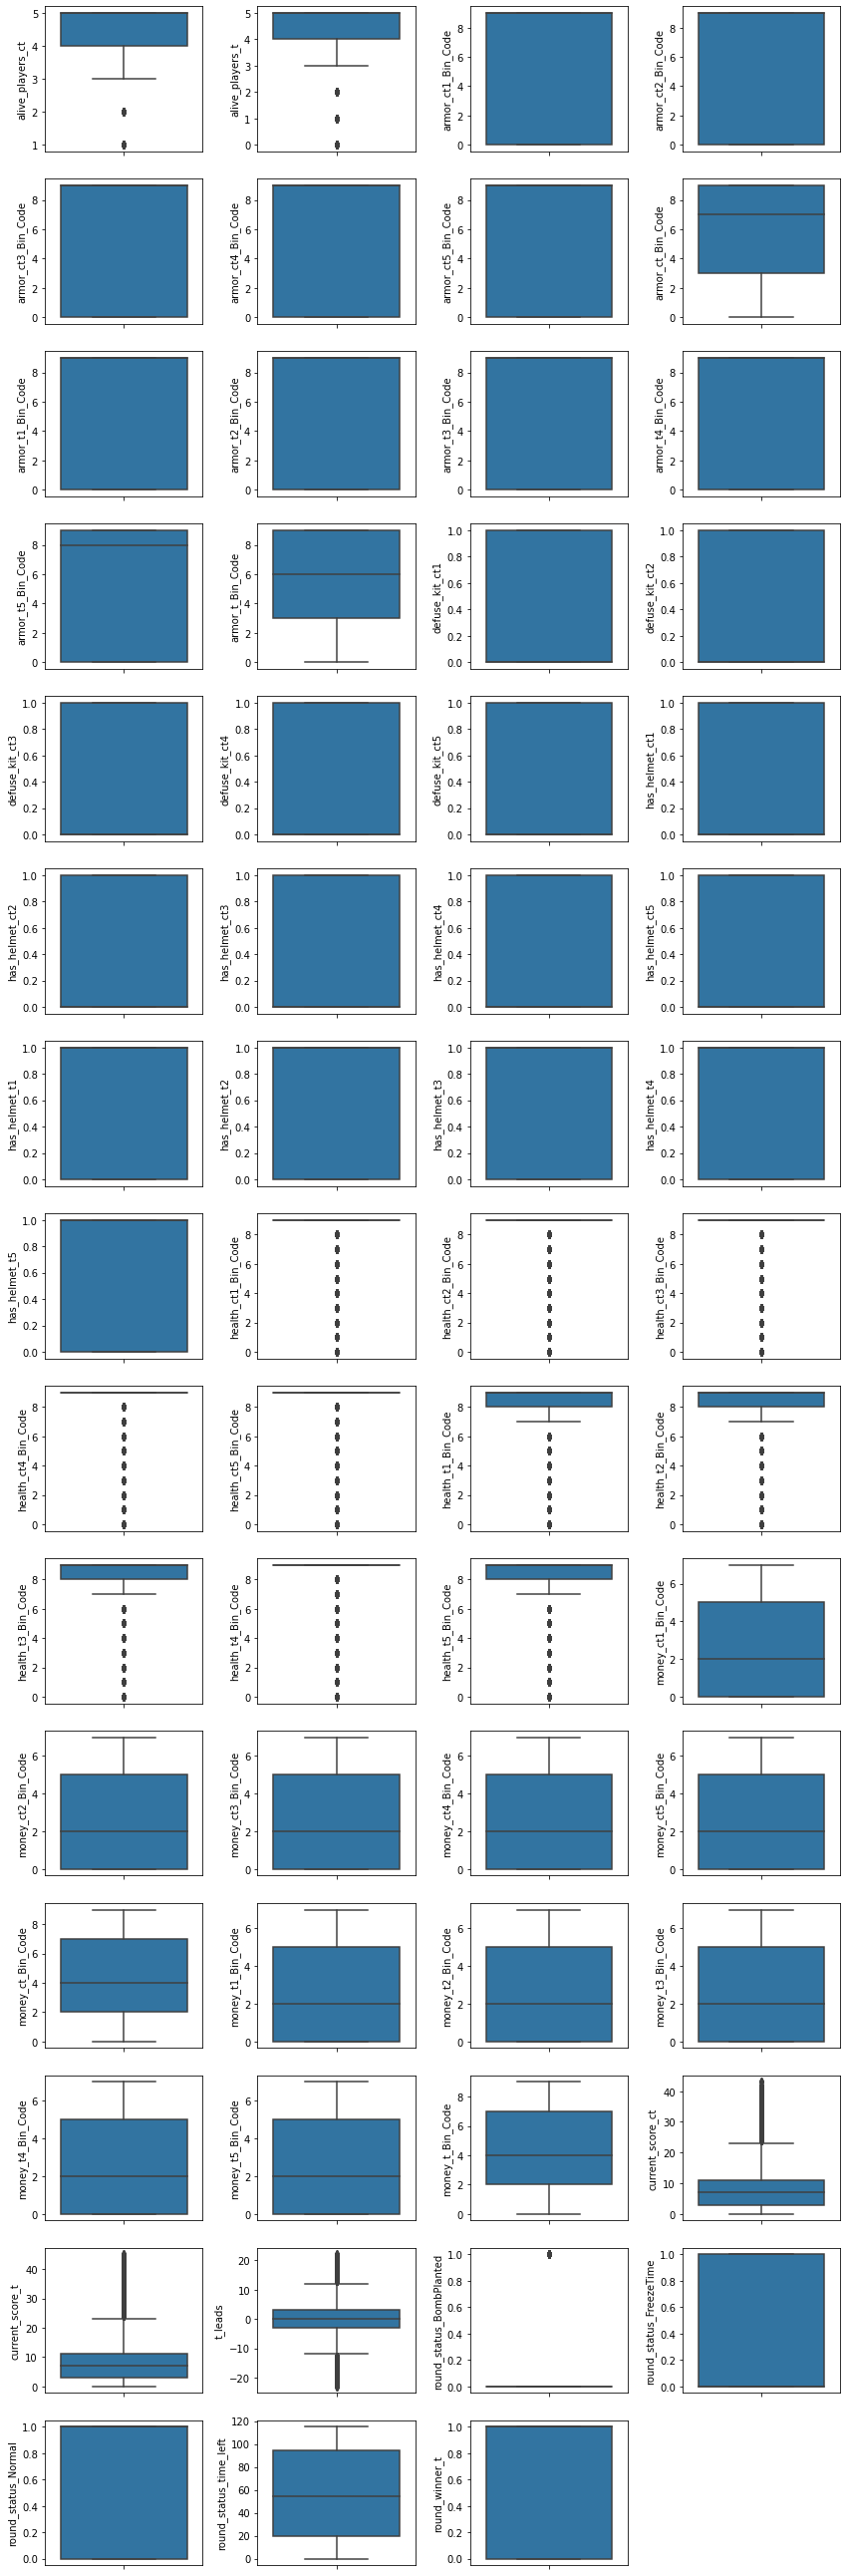

In [28]:
# Univariate Analysis: Box plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_main.columns)):
    fig.add_subplot(15,4,i+1)
    sns.boxplot(y=df_main.iloc[:,i])

plt.tight_layout()
plt.show()

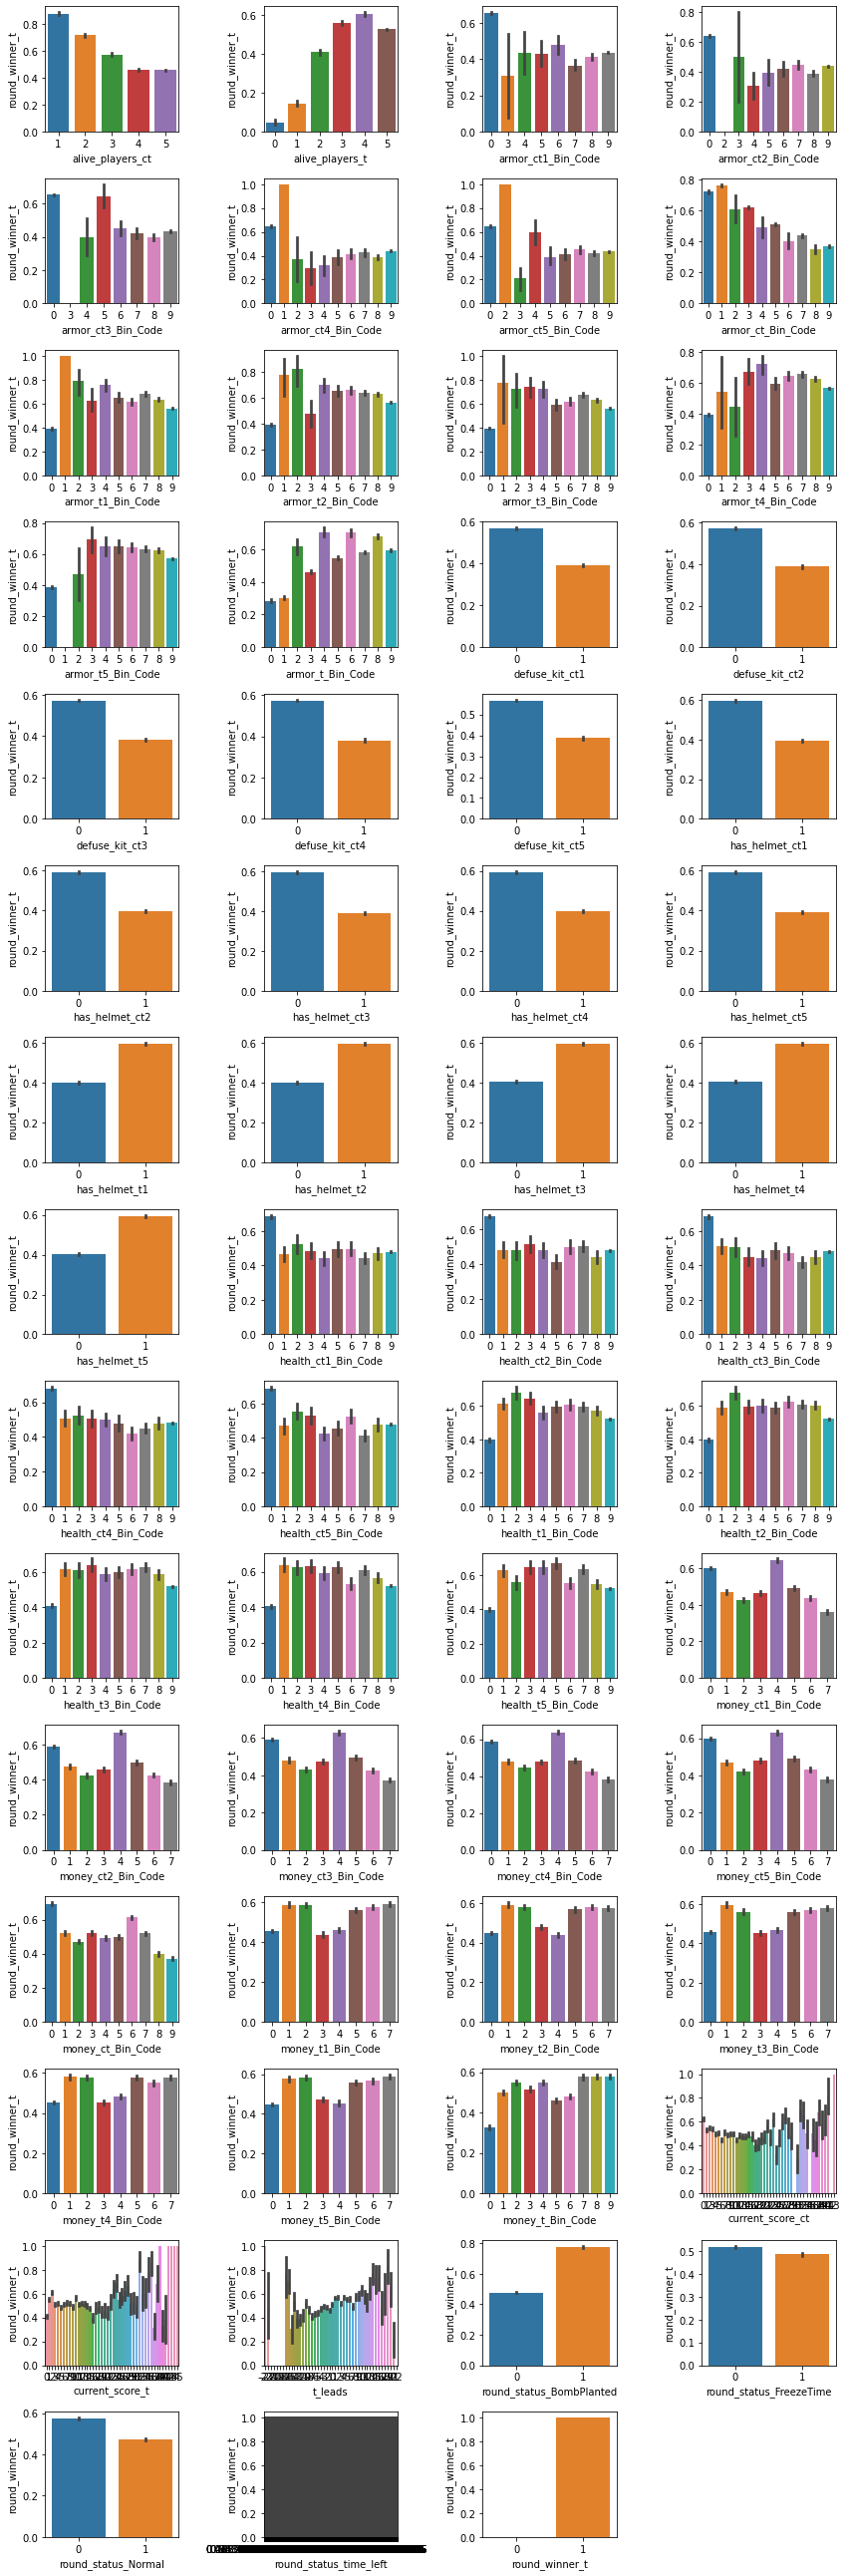

In [29]:
# Bivariate Analysis: Bar plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_main.columns)):
    fig.add_subplot(15,4,i+1)
    sns.barplot(x=df_main.iloc[:,i],y=df_main['round_winner_t'])

plt.tight_layout()
plt.show()

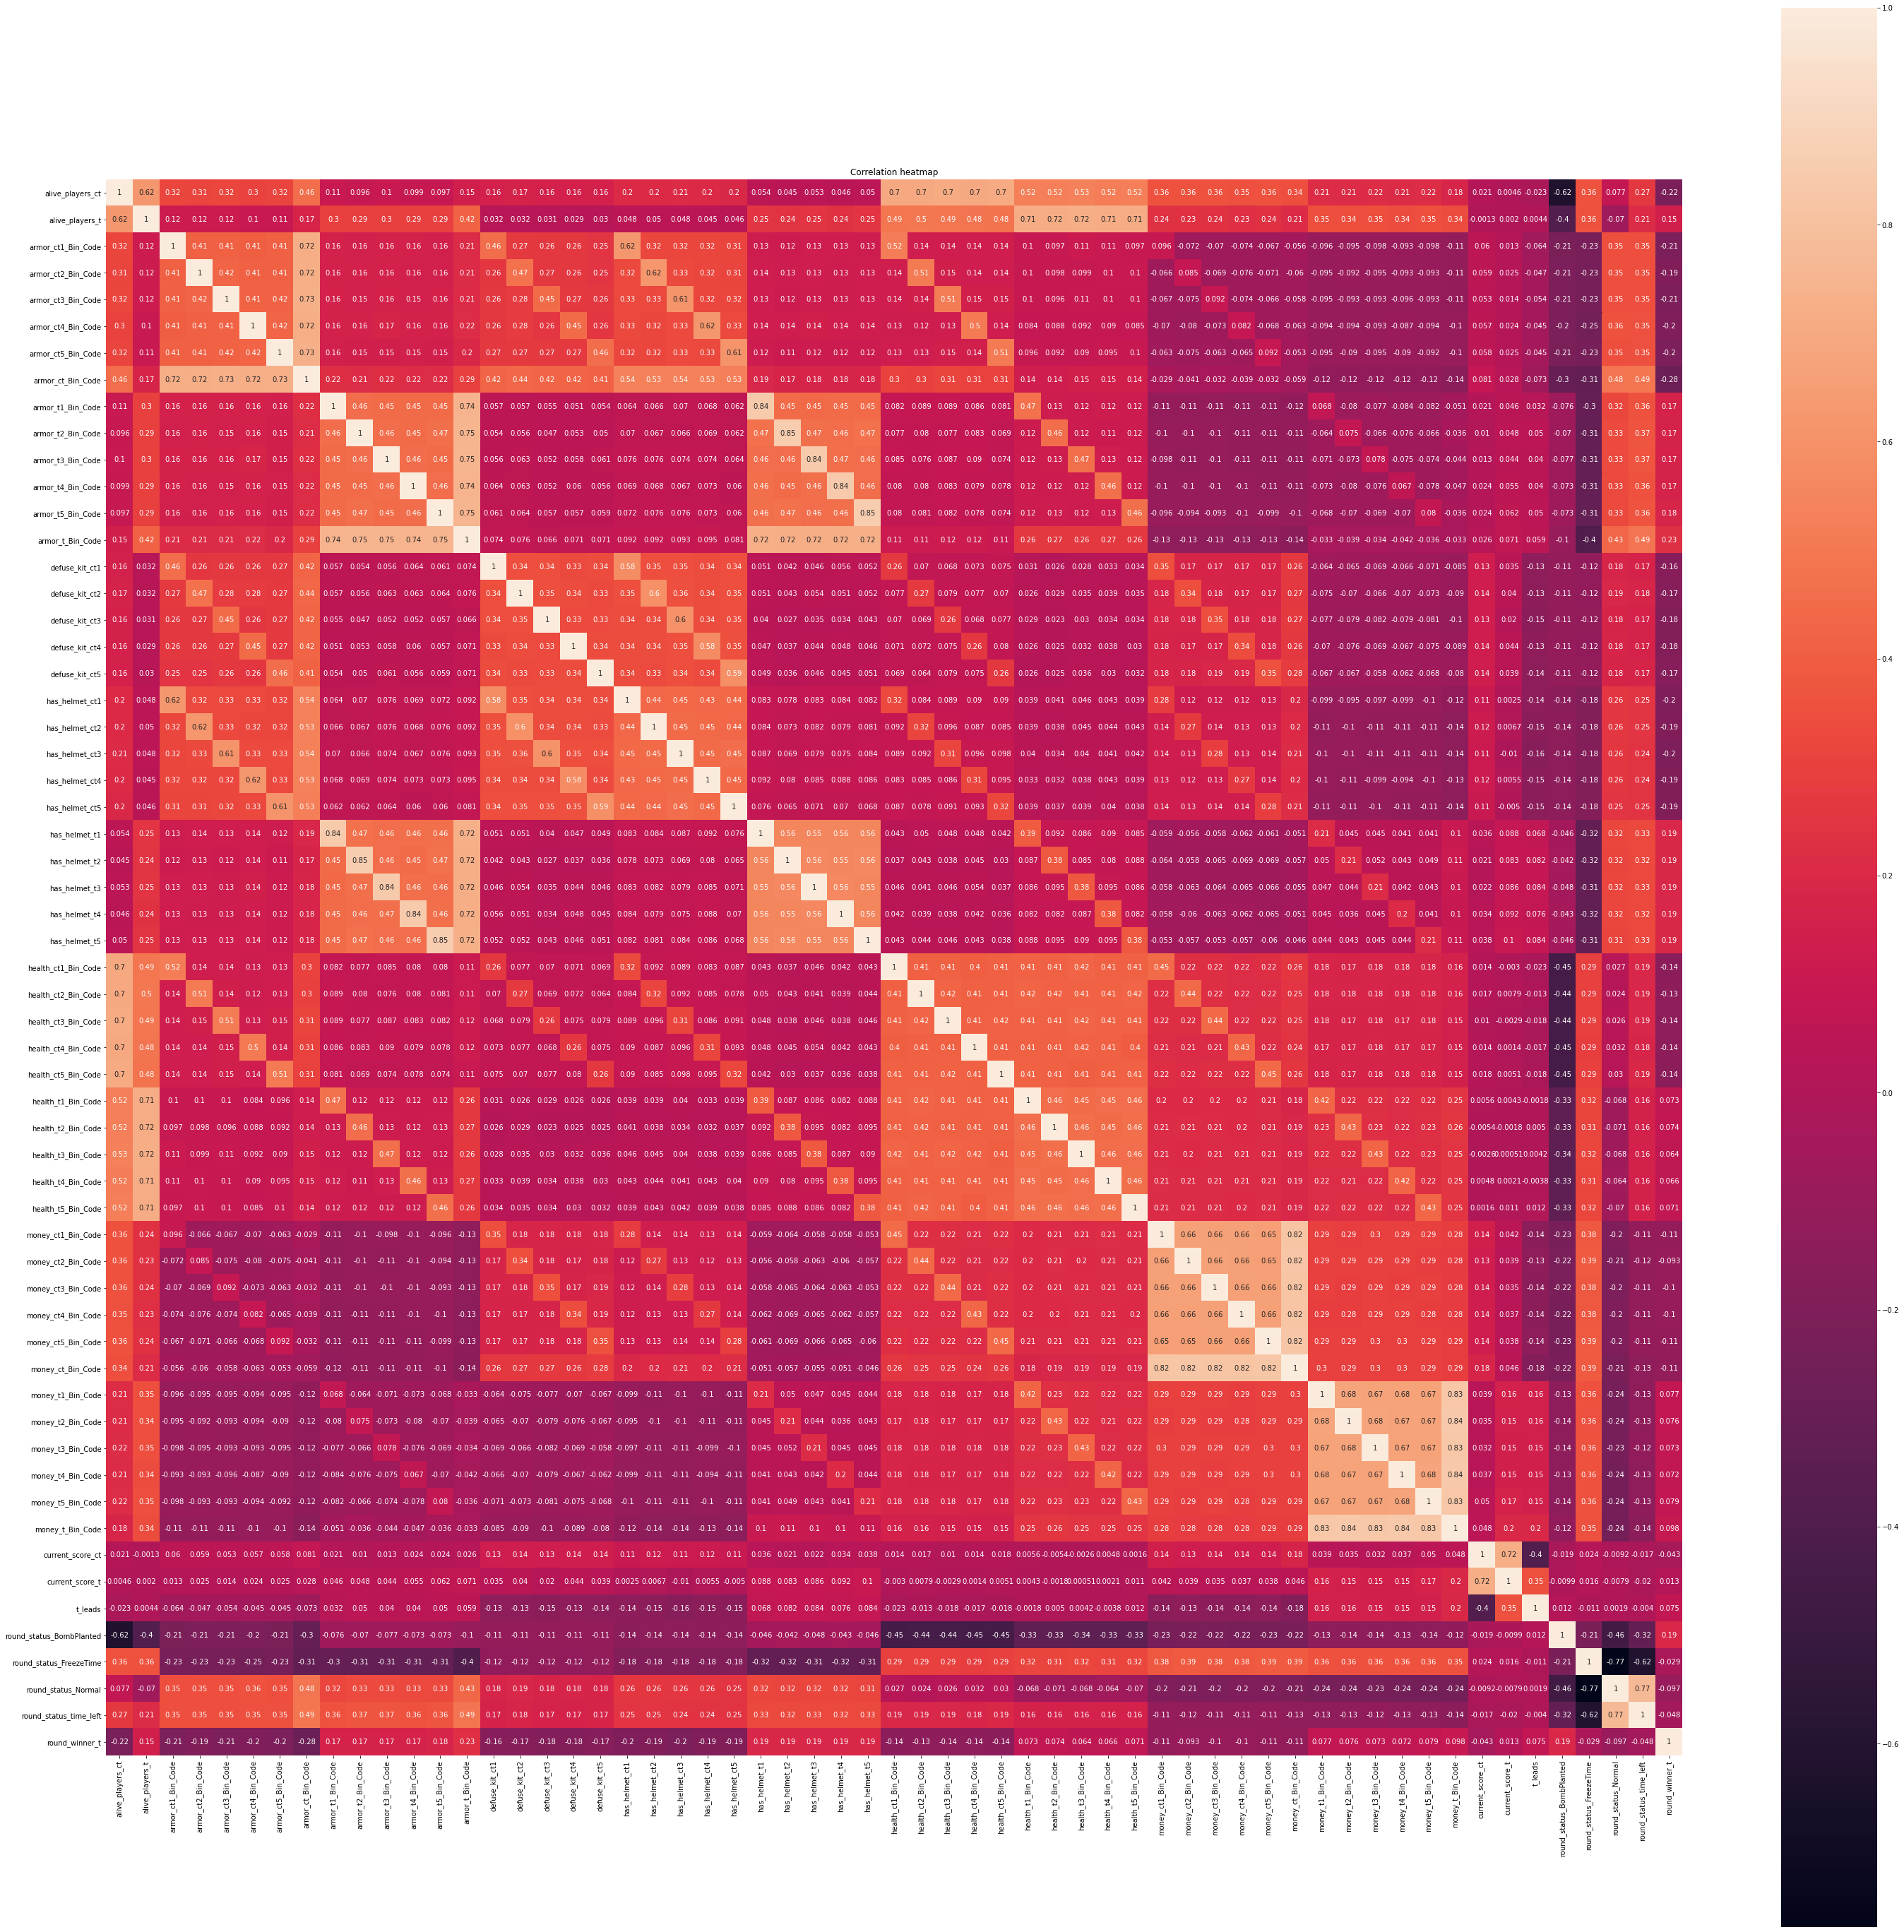

In [30]:
# Correlation heatmap
num_correlation = df_main.select_dtypes(exclude='object').corr()
plt.figure(figsize=(50,50))
plt.title('Correlation heatmap')
sns.heatmap(num_correlation, annot=True, square=True)

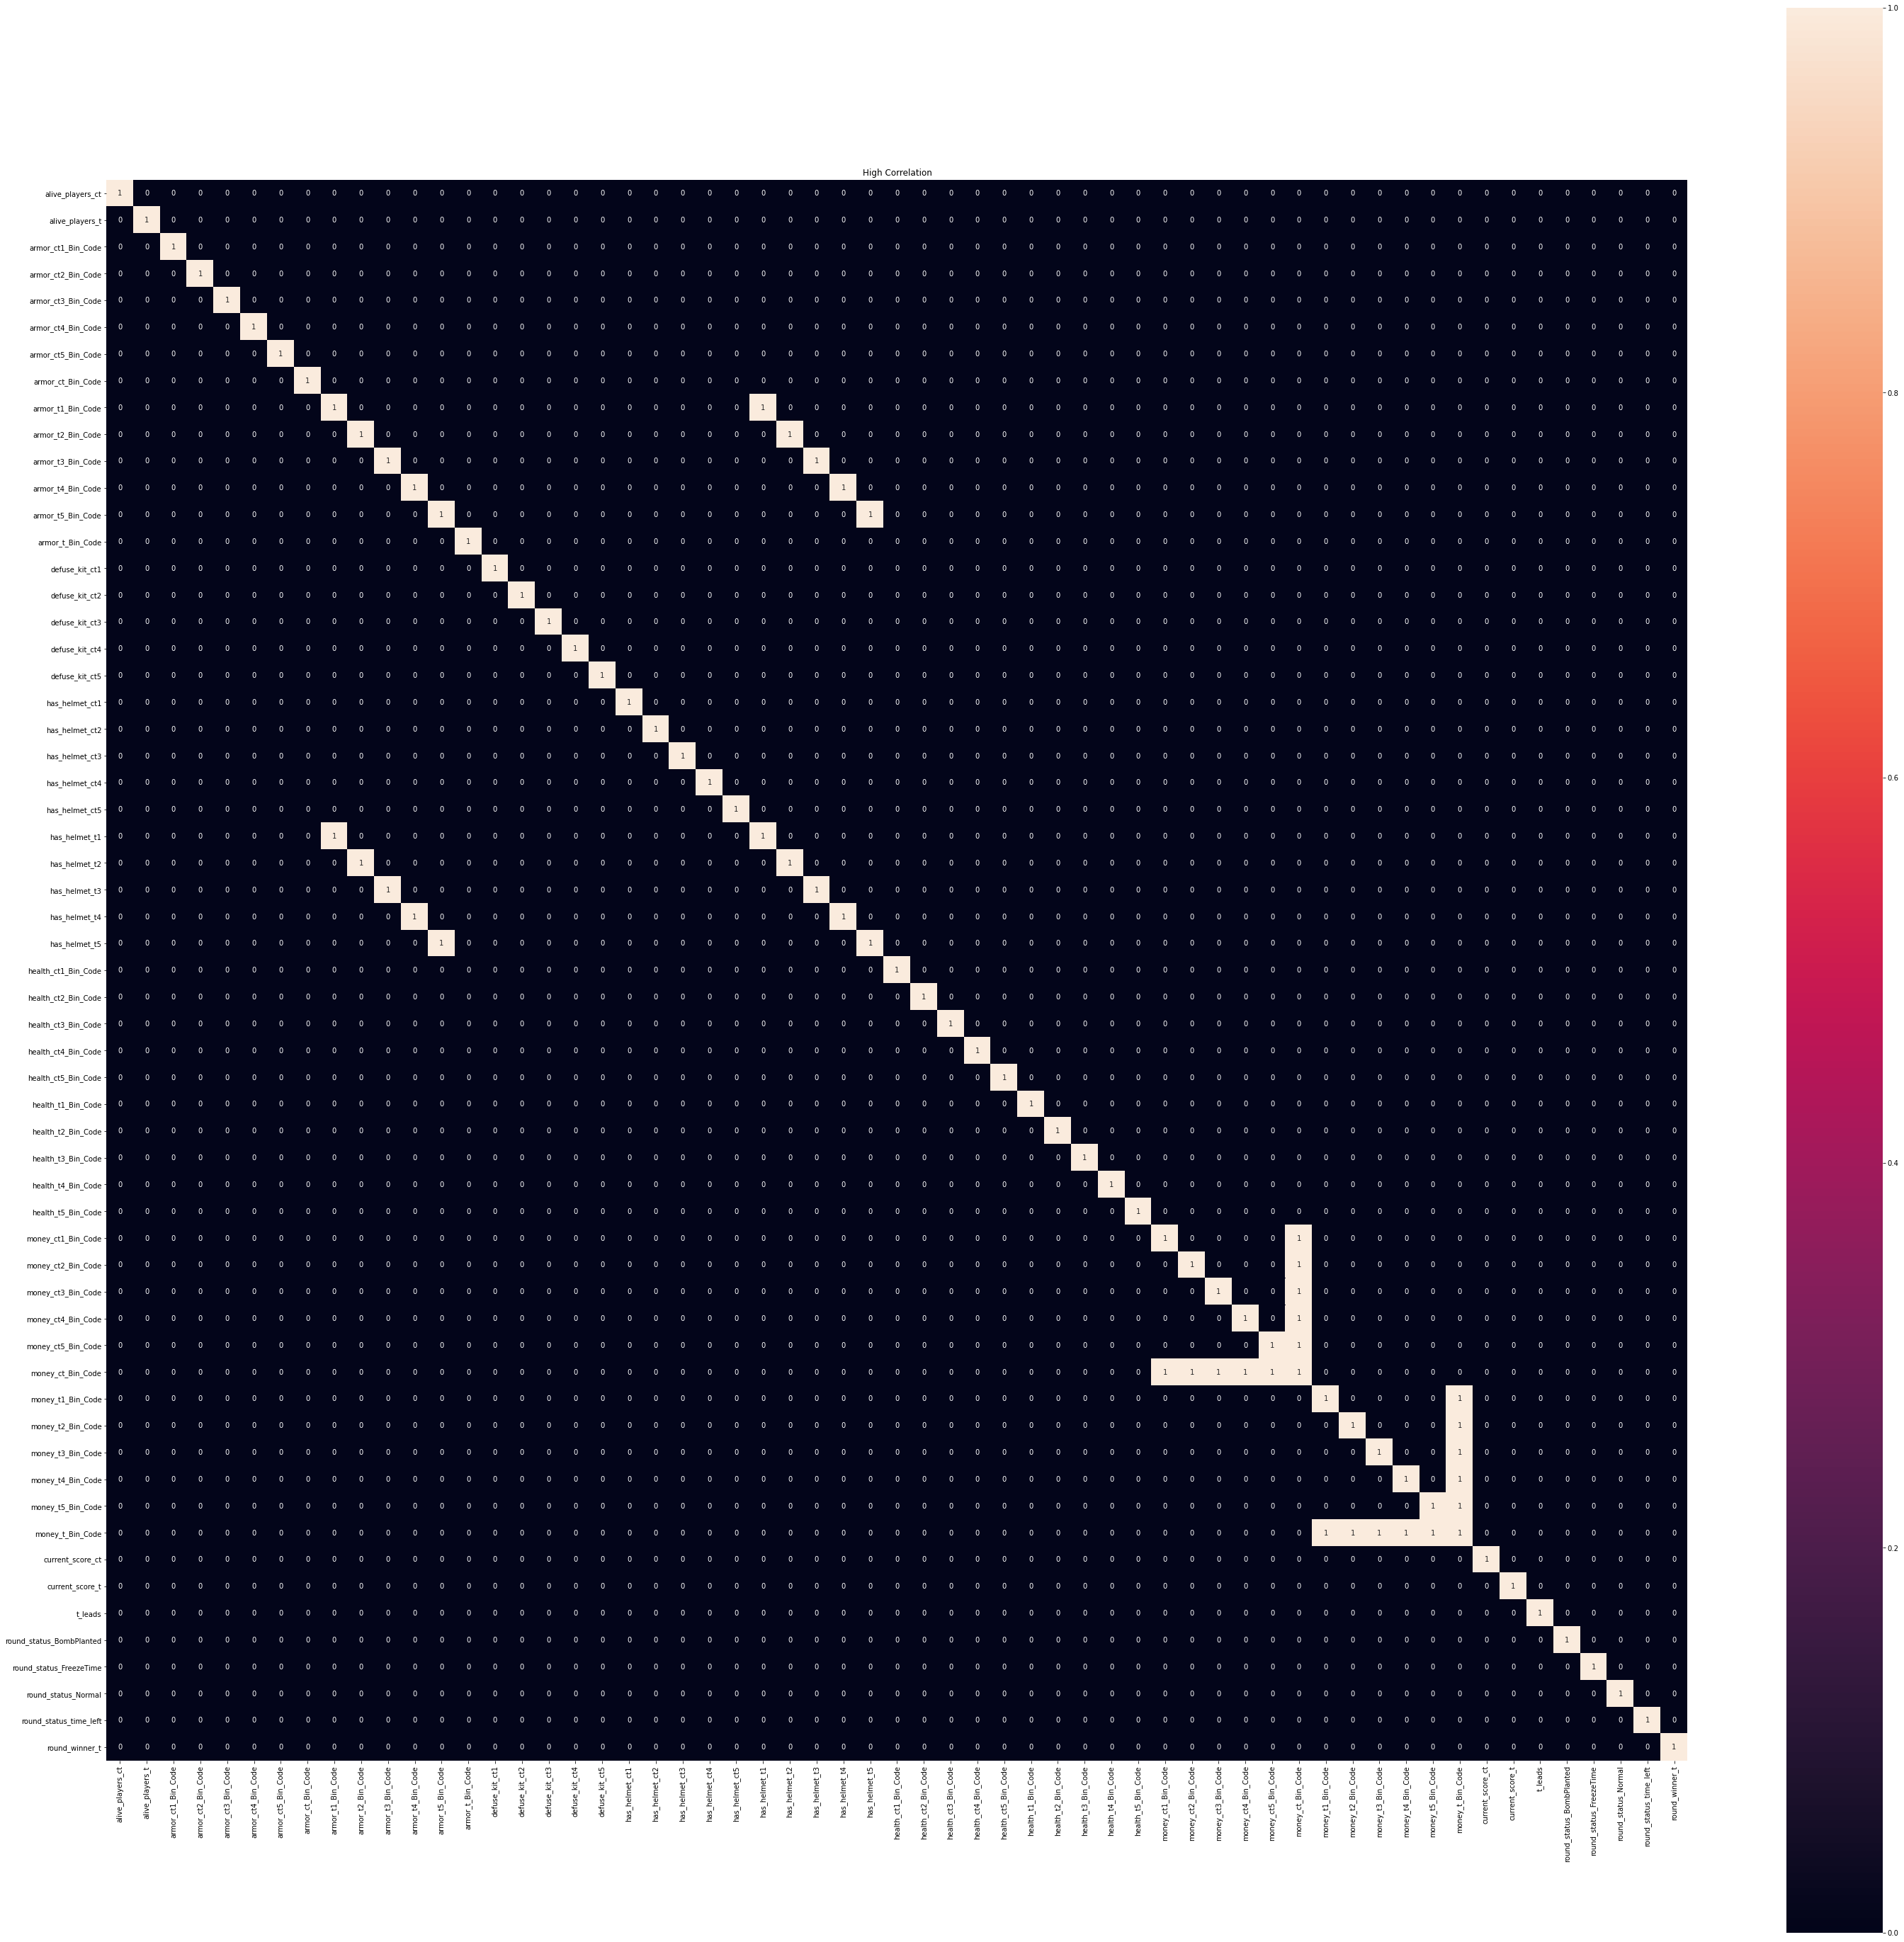

In [31]:
num_correlation = df_main.select_dtypes(exclude='object').corr()
plt.figure(figsize=(50,50))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

In [32]:
corr = num_correlation.corr()
print(corr['round_winner_t'].sort_values(ascending=False))

round_winner_t              1.000000
has_helmet_t2               0.473755
has_helmet_t5               0.467334
has_helmet_t4               0.461703
has_helmet_t3               0.460826
has_helmet_t1               0.460597
round_status_BombPlanted    0.434491
armor_t_Bin_Code            0.426480
armor_t5_Bin_Code           0.396555
t_leads                     0.395969
armor_t2_Bin_Code           0.394533
armor_t4_Bin_Code           0.385867
armor_t1_Bin_Code           0.383574
armor_t3_Bin_Code           0.381407
money_t_Bin_Code            0.243603
money_t1_Bin_Code           0.206623
money_t5_Bin_Code           0.206431
money_t2_Bin_Code           0.202731
money_t3_Bin_Code           0.201313
money_t4_Bin_Code           0.196900
alive_players_t             0.177766
current_score_t             0.107405
health_t2_Bin_Code          0.083568
health_t1_Bin_Code          0.075122
health_t5_Bin_Code          0.072694
health_t4_Bin_Code          0.065996
health_t3_Bin_Code          0.062936
r